# Código da apresentação de NLP

In [93]:
#%%capture
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en
!pip install gensim
!pip install awswrangler
!pip install nltk
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 28.4 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.2.0/en_core_web_sm-3.2.0-py3-none-any.whl (13.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 20.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 900.8/900.8 KB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 47.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 4.1 MB/s eta 0:00:00a 0:00:01


## DCOCUMENTO / CORPUS

In [32]:
import pandas as pd

# Documento e Corpus
df = pd.DataFrame({
    'text': [
      'Sobre live de NLP no UGSP? Eu gostei muito',
      'A live de NLP pode melhorar, não gostei muito'
    ],
    'class': [
        'positivo',
        'negativo'
    ]})

df.head()

,text,class
0,Sobre live de NLP no UGSP? Eu gostei muito,positivo
1,"A live de NLP pode melhorar, não gostei muito",negativo


## TOKENIZAÇÃO

In [10]:
# aplica em uma string
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

nome = 'AWS User Group São Paulo'

print(word_tokenize(nome))
print(nome.split(' '))

[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['AWS', 'User', 'Group', 'São', 'Paulo']
['AWS', 'User', 'Group', 'São', 'Paulo']


In [11]:
# Aplica em uma lista
texto = ['AWS User Group São Paulo','um dois, três']
type(texto)

# usando o split
print(texto[1].split())
[t.split() for t in texto]

['um', 'dois,', 'três']


[['AWS', 'User', 'Group', 'São', 'Paulo'], ['um', 'dois,', 'três']]

## UNIGRAMA

In [14]:
df.text

0               Sobre live de NLP? Eu gostei muito
1    A live de NLP pode melhorar, não gostei muito
Name: text, dtype: object

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,1))
vect.fit(df.text)
text_vect = vect.transform(df.text)

print(pd.DataFrame(text_vect.A, columns=vect.get_feature_names()).to_string())

   de  eu  gostei  live  melhorar  muito  nlp  não  pode  sobre
0   1   1       1     1         0      1    1    0     0      1
1   1   0       1     1         1      1    1    1     1      0


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
text_vect

<2x10 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [19]:
## BIGRAMA

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(2,2))
vect.fit(df.text)
text_vect = vect.transform(df.text)

print(pd.DataFrame(text_vect.A, columns=vect.get_feature_names()).to_string())

   de nlp  eu gostei  gostei muito  live de  melhorar não  nlp eu  nlp pode  não gostei  pode melhorar  sobre live
0       1          1             1        1             0       1         0           0              0           1
1       1          0             1        1             1       0         1           1              1           0


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
# REGEX

In [22]:
email = "vfcarida@gmail.com"

In [23]:
# função split do Python
email.split("@")[1].split(".")[0]

'gmail'

In [24]:
# importa pacote de regular expression
import re

regex = r"(?<=@)[^.]+(?=\.)"
re.findall(regex, email)

['gmail']

## STOPWORDS

In [26]:
import nltk
nltk.download('stopwords')

stops = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
# lista todas as stopwords
stops

['i',
 'me',
 'my',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',


In [27]:
# remove uma stopword da lista
stops.pop(3)

'myself'

In [29]:
# podemos criar nossa propria lista
stops = stops + ["UGSP"]

In [34]:
# Aplicando a utilização das stopwords
from sklearn.feature_extraction.text import CountVectorizer

stops = nltk.corpus.stopwords.words('portuguese') + ["ugsp"]

vect = CountVectorizer(ngram_range=(1,1), stop_words=stops)
vect.fit(df.text)
text_vect = vect.transform(df.text)

print(pd.DataFrame(text_vect.A, columns=vect.get_feature_names()).T.to_string())

          0  1
gostei    1  1
live      1  1
melhorar  0  1
nlp       1  1
pode      0  1
sobre     1  0


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
print(nltk.corpus.stopwords.words('portuguese')[:10])

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']


In [37]:
len(stops)

205

## Stemmer (Stemização)

In [38]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
exemplos = ["connection","connections","connective","connecting","connected"]
print(exemplos)

for word in exemplos:
  print(ps.stem(word))

['connection', 'connections', 'connective', 'connecting', 'connected']
connect
connect
connect
connect
connect


In [39]:
# Stemização
from nltk.stem import PorterStemmer
from nltk.stem.rslp import RSLPStemmer
import nltk 
nltk.download('rslp')

doc = ["pedra","pedreira","pedreiro"]
print(doc)

ps = PorterStemmer()
rslp = RSLPStemmer()

for word in doc:
    print(ps.stem(word), ' - ', rslp.stem(word))

['pedra', 'pedreira', 'pedreiro']
pedra  -  pedr
pedreira  -  pedr
pedreiro  -  pedr


[nltk_data] Downloading package rslp to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [42]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

df['tokens'] = df.text.apply(word_tokenize)
df['tokens']

[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [Sobre, live, de, NLP, no, UGSP, ?, Eu, gostei...
1    [A, live, de, NLP, pode, melhorar, ,, não, gos...
Name: tokens, dtype: object

In [43]:
from nltk.stem import PorterStemmer
from nltk.stem.rslp import RSLPStemmer
import nltk
nltk.download('rslp')

tokens = df.tokens[0]
tokens = tokens + df.tokens[1]

ps = PorterStemmer()
rslp = RSLPStemmer()

for tok in tokens:
  #print('Original: %s \t\t  PorterStemmer: %s \t\t RSLPStemmer: %s' % (tok, ps.stem(tok), rslp.stem(tok)))
  print(f'Original: {tok:{11}} PorterStemmer: {ps.stem(tok):{10}} RSLPStemmer: {rslp.stem(tok):{10}}')


Original: Sobre       PorterStemmer: sobr       RSLPStemmer: sobr      
Original: live        PorterStemmer: live       RSLPStemmer: liv       
Original: de          PorterStemmer: de         RSLPStemmer: de        
Original: NLP         PorterStemmer: nlp        RSLPStemmer: nlp       
Original: no          PorterStemmer: no         RSLPStemmer: no        
Original: UGSP        PorterStemmer: ugsp       RSLPStemmer: ugsp      
Original: ?           PorterStemmer: ?          RSLPStemmer: ?         
Original: Eu          PorterStemmer: eu         RSLPStemmer: eu        
Original: gostei      PorterStemmer: gostei     RSLPStemmer: gost      
Original: muito       PorterStemmer: muito      RSLPStemmer: muit      
Original: A           PorterStemmer: a          RSLPStemmer: a         
Original: live        PorterStemmer: live       RSLPStemmer: liv       
Original: de          PorterStemmer: de         RSLPStemmer: de        
Original: NLP         PorterStemmer: nlp        RSLPStemmer: nlp

[nltk_data] Downloading package rslp to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


## Lemmatizer (Lematização)

In [ ]:
import nltk
nltk.download('omw-1.4')

In [47]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

exemplos = ["connection","connections","connective","connecting","connected"]
wnl = WordNetLemmatizer()

for word in exemplos:
    print(wnl.lemmatize(word,"v"))

connection
connections
connective
connect
connect


[nltk_data] Downloading package wordnet to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## TF IDF

In [49]:
import numpy as np

In [50]:
a = "Essa é a primeira sentença".split()
b = "Aqui é a segunda sentença".split()
c = "E, por fim a última frase".split()

In [51]:
def tfidf(word):
    tf = []
    count_n = 0
    for sentence in [a, b, c]:
        # calculate TF
        t_count = len([x for x in sentence if x == word])
        tf.append(t_count/len(sentence))
        # count number of docs for IDF
        count_n += 1 if word in sentence else 0
    idf = np.log10(len([a, b, c]) / count_n)
    return [round(_tf*idf, 4) for _tf in tf]

# -------------------
word = 'a'
tfidf_a, tfidf_b, tfidf_c = tfidf(word)
print(f'TFIDF({word})')
print(f"TF-IDF a: {tfidf_a}\nTF-IDF b: {tfidf_b}\nTF-IDF c: {tfidf_c}\n")    

# -------------------
word = 'segunda'
tfidf_a, tfidf_b, tfidf_c = tfidf(word)
print(f'TFIDF({word})')
print(f"TF-IDF a: {tfidf_a}\nTF-IDF b: {tfidf_b}\nTF-IDF c: {tfidf_c}\n")

TFIDF(a)
TF-IDF a: 0.0
TF-IDF b: 0.0
TF-IDF c: 0.0

TFIDF(segunda)
TF-IDF a: 0.0
TF-IDF b: 0.0954
TF-IDF c: 0.0



In [52]:
vocab = set(a+b+c)
print(vocab)

{'sentença', 'fim', 'última', 'frase', 'Essa', 'por', 'primeira', 'segunda', 'E,', 'a', 'é', 'Aqui'}


In [53]:
# initialize vectors
vec_a = []
vec_b = []
vec_c = []

for word in vocab:
    tfidf_a, tfidf_b, tfidf_c = tfidf(word)
    vec_a.append(tfidf_a)
    vec_b.append(tfidf_b)
    vec_c.append(tfidf_c)

In [54]:
print(vec_a)

[0.0352, 0.0, 0.0, 0.0, 0.0954, 0.0, 0.0954, 0.0, 0.0, 0.0, 0.0352, 0.0]


In [55]:
print(vec_b)

[0.0352, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0954, 0.0, 0.0, 0.0352, 0.0954]


In [56]:
print(vec_c)

[0.0, 0.0795, 0.0795, 0.0795, 0.0, 0.0795, 0.0, 0.0, 0.0795, 0.0, 0.0, 0.0]


TF

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect = TfidfVectorizer(ngram_range=(1,1), use_idf=False, norm='l1')
vect.fit(df.text)
tf_vect = vect.transform(df.text)

print(pd.DataFrame(tf_vect.A, columns=vect.get_feature_names()).T.to_string())

                 0      1
de        0.111111  0.125
eu        0.111111  0.000
gostei    0.111111  0.125
live      0.111111  0.125
melhorar  0.000000  0.125
muito     0.111111  0.125
nlp       0.111111  0.125
no        0.111111  0.000
não       0.000000  0.125
pode      0.000000  0.125
sobre     0.111111  0.000
ugsp      0.111111  0.000


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TF-IDF

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect = TfidfVectorizer() 
vect.fit(df.text)
tfidf_vect = vect.transform(df.text)

print(pd.DataFrame(tfidf_vect.A, columns=vect.get_feature_names()).T.to_string())

                 0         1
de        0.278409  0.302531
eu        0.391294  0.000000
gostei    0.278409  0.302531
live      0.278409  0.302531
melhorar  0.000000  0.425196
muito     0.278409  0.302531
nlp       0.278409  0.302531
no        0.391294  0.000000
não       0.000000  0.425196
pode      0.000000  0.425196
sobre     0.391294  0.000000
ugsp      0.391294  0.000000


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Similaridade tf-idf versus one hot

In [59]:
# a) Essa é a primeira sentença
# b) Aqui é a segunda sentença 
# c) E, por fim a última frase

# Vocabulario
#                'Aqui', 'E,',  'Essa',  'a',  'fim',    'frase',   'por',  'primeira',  'segunda',  'sentença',  'é',  'última'
bow_a = np.array([0,      0,       1,     1,     0,         0,        0,         1,          0,          1,        1,       0])
bow_b = np.array([1,      0,       0,     1,     0,         0,        0,         0,          1,          1,        1,       0])
bow_c = np.array([0,      1,       0,     1,     1,         1,        1,         0,          0,          0,        0,       1])

In [60]:
# Similaridade BoW
from scipy.spatial import distance

BoW_vec_a_vec_b = 1 - distance.cosine(bow_a, bow_b)
BoW_vec_a_vec_c = 1 - distance.cosine(bow_a, bow_c)
BoW_vec_b_vec_c = 1 - distance.cosine(bow_b, bow_c)

print(f'similaridade bow vec_a_vec_b: {BoW_vec_a_vec_b :.3}')
print(f'similaridade bow vec_a_vec_c: {BoW_vec_a_vec_c :.3}')
print(f'similaridade bow vec_b_vec_c: {BoW_vec_b_vec_c :.3}')

similaridade bow vec_a_vec_b: 0.6
similaridade bow vec_a_vec_c: 0.183
similaridade bow vec_b_vec_c: 0.183


In [61]:
# Similaridade tf-idf

sim_vec_a_vec_b = 1 - distance.cosine(np.array(vec_a), np.array(vec_b))
sim_vec_a_vec_c = 1 - distance.cosine(np.array(vec_a), np.array(vec_c))
sim_vec_b_vec_c = 1 - distance.cosine(np.array(vec_b), np.array(vec_c))

print(f'similaridade tf-idf vec_a_vec_b: {sim_vec_a_vec_b :.3}')
print(f'similaridade tf-idf vec_a_vec_c: {sim_vec_a_vec_c :.3}')
print(f'similaridade tf-idf vec_b_vec_c: {sim_vec_b_vec_c :.3}')

similaridade tf-idf vec_a_vec_b: 0.12
similaridade tf-idf vec_a_vec_c: 0.0
similaridade tf-idf vec_b_vec_c: 0.0


É importante notar que os tamanhos de vocabulário podem facilmente estar na faixa de > 20K, 
então os vetores produzidos usando este método são incrivelmente esparsos - o que significa 
que não podemos codificar qualquer significado semântico.

## Word2Vec

> #### [fonte do dataset](https://www.kaggle.com/ambarish/fun-in-text-mining-with-simpsons/data?select=simpsons_script_lines.csv) 
> #### [fonte do código](https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial)
> #### [word2vec introdution](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)
> #### [word2vec artigo](https://arxiv.org/abs/1301.3781)

In [63]:
import pandas as pd

df = pd.read_csv('./simpsons_processed.csv', index_col=0)
df

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
...,...,...
132105,Miss Hoover,I'm back.
132106,Miss Hoover,"You see, class, my Lyme disease turned out to ..."
132107,Miss Hoover,Psy-cho-so-ma-tic.
132108,Ralph Wiggum,Does that mean you were crazy?


In [64]:
df.spoken_words.to_list()[3] 

'That life is worth living.'

In [65]:
import re  # For preprocessing
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [66]:
def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [67]:
# Regex 
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['spoken_words'])

In [68]:
t = time()

nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_process=-1)]

print(f'Time to clean up everything: {round((time() - t)/60, 2)} mins')

Time to clean up everything: 1.55 mins


In [69]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(86207, 1)

In [70]:
df_clean

,clean
0,actually little disease magazine news show nat...
2,know sure like talk touch lesson plan teach
3,life worth live
4,poll open end recess case decide thought final...
7,victory party slide
...,...
132086,oh mom wonderful find favorite dish help
132092,dye shoe pink
132103,mr bergstrom request pleasure company mr bergs...
132106,class lyme disease turn


In [71]:
from gensim.models.phrases import Phrases, Phraser

In [72]:
# Phrases takes a list of list words
sent = [row.split() for row in df_clean['clean']]
sent[:3]

[['actually',
  'little',
  'disease',
  'magazine',
  'news',
  'show',
  'natural',
  'think'],
 ['know', 'sure', 'like', 'talk', 'touch', 'lesson', 'plan', 'teach'],
 ['life', 'worth', 'live']]

In [73]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

INFO - 02:04:37: collecting all words and their counts
INFO - 02:04:37: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 02:04:37: PROGRESS: at sentence #10000, processed 63781 words and 52974 word types
INFO - 02:04:37: PROGRESS: at sentence #20000, processed 131388 words and 100087 word types
INFO - 02:04:37: PROGRESS: at sentence #30000, processed 193529 words and 138744 word types
INFO - 02:04:37: PROGRESS: at sentence #40000, processed 250538 words and 172822 word types
INFO - 02:04:37: PROGRESS: at sentence #50000, processed 311834 words and 208567 word types
INFO - 02:04:37: PROGRESS: at sentence #60000, processed 374245 words and 243766 word types
INFO - 02:04:37: PROGRESS: at sentence #70000, processed 437105 words and 278729 word types
INFO - 02:04:37: PROGRESS: at sentence #80000, processed 498678 words and 311828 word types
INFO - 02:04:37: collected 331703 token types (unigram + bigrams) from a corpus of 539804 words and 86207 sentences
INFO - 02:04:37: 

In [74]:
# The goal of Phraser() is to cut down memory consumption of Phrases()
bigram = Phraser(phrases)

INFO - 02:04:37: exporting phrases from Phrases<331703 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000>
INFO - 02:04:38: FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<128 phrases, min_count=30, threshold=10.0> from Phrases<331703 vocab, min_count=30, threshold=10.0, max_vocab_size=40000000> in 0.59s', 'datetime': '2022-04-12T02:04:38.483383', 'gensim': '4.1.2', 'python': '3.9.10 | packaged by conda-forge | (main, Feb  1 2022, 21:24:37) \n[GCC 9.4.0]', 'platform': 'Linux-4.14.262-200.489.amzn2.x86_64-x86_64-with-glibc2.31', 'event': 'created'}


In [75]:
# Transform the corpus based on the bigrams detected:
sentences = bigram[sent]

## Most Frequent Words:
> #### Mainly a sanity check of the effectiveness of the lemmatization, removal of stopwords, and addition of bigrams.

In [76]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

29723

In [77]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['oh', 'like', 'know', 'get', 'hey', 'think', 'come', 'right', 'look', 'want']

## Training the model - Gensim Word2Vec Implementation:

### The training of the model has 3 steps:

> #### 1. `Word2Vec()`: In this first step, we set up the parameters of the model one-by-one.
> #### 2.  `build_vocab()`: build the vocabulary from a sequence of sentences and thus initialized the model.
> #### 3. `train()`: train the model. The loggings here are mainly useful for monitoring, making sure that no threads are executed instantaneously.

In [78]:
import os
from gensim.models import Word2Vec

In [79]:
cores = os.cpu_count() # Count the number of cores in a computer
cores

4

In [80]:
# 1 Word2Vec()
w2v_model = Word2Vec(
    min_count=20,     # int - Ignores all words with total absolute frequency lower than this - (2, 100)
    window=2,         # int - The maximum distance between the current and predicted word within a sentence. 
    vector_size=300,         # int - Dimensionality of the feature vectors. - (50, 300)
    sample=6e-5,      # float - The threshold for configuring which higher-frequency words are randomly downsampled. 
    alpha=0.03,       # float - The initial learning rate - (0.01, 0.05)
    min_alpha=0.0007, # float - Learning rate will linearly drop to min_alpha as training progresses. 
    negative=20,      # int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. 
    workers=cores,    #  int - Use these many worker threads to train the model (=faster training with multicore machines) 
    )

INFO - 02:04:40: Word2Vec lifecycle event {'params': 'Word2Vec(vocab=0, vector_size=300, alpha=0.03)', 'datetime': '2022-04-12T02:04:40.830436', 'gensim': '4.1.2', 'python': '3.9.10 | packaged by conda-forge | (main, Feb  1 2022, 21:24:37) \n[GCC 9.4.0]', 'platform': 'Linux-4.14.262-200.489.amzn2.x86_64-x86_64-with-glibc2.31', 'event': 'created'}


In [81]:
# Build the Vocabulary
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print(f'Time to build vocab: {round((time()-t)/60, 2)} mins')

INFO - 02:05:15: collecting all words and their counts
INFO - 02:05:15: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 02:05:15: PROGRESS: at sentence #10000, processed 61910 words, keeping 9532 word types
INFO - 02:05:15: PROGRESS: at sentence #20000, processed 127742 words, keeping 14395 word types
INFO - 02:05:15: PROGRESS: at sentence #30000, processed 188296 words, keeping 17438 word types
INFO - 02:05:15: PROGRESS: at sentence #40000, processed 243931 words, keeping 20118 word types
INFO - 02:05:15: PROGRESS: at sentence #50000, processed 303644 words, keeping 22527 word types
INFO - 02:05:15: PROGRESS: at sentence #60000, processed 364495 words, keeping 24816 word types
INFO - 02:05:15: PROGRESS: at sentence #70000, processed 425933 words, keeping 26982 word types
INFO - 02:05:15: PROGRESS: at sentence #80000, processed 486150 words, keeping 28784 word types
INFO - 02:05:15: collected 29723 word types from a corpus of 526126 raw words and 86207 sentence

Time to build vocab: 0.01 mins


In [82]:
# Train the Model
t = time()

w2v_model.train(
    sentences, 
    total_examples=w2v_model.corpus_count, 
    epochs=30, 
    report_delay=1)

print(f'Time to train the model: {round((time()-t)/60, 2)} mins')

INFO - 02:05:24: Word2Vec lifecycle event {'msg': 'training model with 4 workers on 3335 vocabulary and 300 features, using sg=0 hs=0 sample=6e-05 negative=20 window=2 shrink_windows=True', 'datetime': '2022-04-12T02:05:24.530574', 'gensim': '4.1.2', 'python': '3.9.10 | packaged by conda-forge | (main, Feb  1 2022, 21:24:37) \n[GCC 9.4.0]', 'platform': 'Linux-4.14.262-200.489.amzn2.x86_64-x86_64-with-glibc2.31', 'event': 'train'}
INFO - 02:05:25: EPOCH 1 - PROGRESS: at 51.54% examples, 100814 words/s, in_qsize 8, out_qsize 0
INFO - 02:05:25: worker thread finished; awaiting finish of 3 more threads
INFO - 02:05:25: worker thread finished; awaiting finish of 2 more threads
INFO - 02:05:25: worker thread finished; awaiting finish of 1 more threads
INFO - 02:05:25: worker thread finished; awaiting finish of 0 more threads
INFO - 02:05:25: EPOCH - 1 : training on 526126 raw words (200641 effective words) took 1.4s, 143440 effective words/s
INFO - 02:05:26: EPOCH 2 - PROGRESS: at 91.58% exa

Time to train the model: 0.56 mins


In [83]:
# As we do not plan to train the model any further, we are calling init_sims(), which will make the model much more memory-efficient
w2v_model.init_sims(replace=True)

/tmp/ipykernel_93/1625311014.py:2: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v_model.init_sims(replace=True)
WARNING - 02:05:58: destructive init_sims(replace=True) deprecated & no longer required for space-efficiency


In [84]:
print(w2v_model.wv.get_vector('homer').shape)
w2v_model.wv.get_vector('homer')

(300,)


array([-2.42919456e-02,  5.09181023e-02, -1.17037697e-02,  9.51541960e-02,
       -4.54901010e-02, -3.74572612e-02,  1.73543707e-01,  1.39063641e-01,
        5.95627502e-02,  1.87010393e-02, -8.00637901e-02, -9.02435184e-02,
        3.70586254e-02, -3.14564295e-02, -3.46417762e-02, -3.33409160e-02,
        2.52631418e-02, -5.33250831e-02,  5.27000874e-02,  4.53728512e-02,
        1.96653139e-02, -1.55091081e-02, -4.78997491e-02,  5.57172345e-03,
        1.12088144e-01,  8.25060531e-03, -5.44691794e-02,  9.24429670e-02,
       -6.02718033e-02, -1.39388129e-01,  5.48761487e-02, -1.33969286e-03,
       -9.03857574e-02, -2.22072415e-02, -3.16865779e-02, -4.23405059e-02,
        7.26168451e-04, -4.36034612e-02, -4.08876464e-02, -5.19874580e-02,
       -1.28376279e-02, -4.02478836e-02, -2.38068067e-02, -1.69971958e-02,
       -2.48663928e-02,  4.04266417e-02, -1.73026919e-02,  6.58231303e-02,
       -2.04302799e-02,  7.22495914e-02,  7.03859404e-02, -4.67197783e-02,
       -5.68935089e-02, -

In [85]:
w2v_model.wv.most_similar(positive=["homer"])

[('marge', 0.6923187971115112),
 ('hammock', 0.6697026491165161),
 ('crummy', 0.6665980219841003),
 ('sweetheart', 0.6553011536598206),
 ('gee', 0.6527481079101562),
 ('bongo', 0.6498366594314575),
 ('sake', 0.6484313011169434),
 ('eliza', 0.6448482275009155),
 ('bartender', 0.64175945520401),
 ('compliment', 0.6363524198532104)]

In [86]:
w2v_model.wv.most_similar(positive=["marge"])

[('eliza', 0.7096320390701294),
 ('homer', 0.692318856716156),
 ('sweetheart', 0.6720661520957947),
 ('grownup', 0.6687307357788086),
 ('embarrass', 0.664482831954956),
 ('fault', 0.6623795032501221),
 ('homie', 0.6614170074462891),
 ('hopeless', 0.6560583710670471),
 ('becky', 0.652549684047699),
 ('surprised', 0.6509789824485779)]

In [87]:
w2v_model.wv.most_similar(positive=["bart"])

[('lisa', 0.8067106604576111),
 ('hearing', 0.7764644026756287),
 ('mom_dad', 0.7431566715240479),
 ('jealous', 0.7412236928939819),
 ('surprised', 0.7409850358963013),
 ('homework', 0.7195799350738525),
 ('mom', 0.7194384336471558),
 ('convince', 0.7126911282539368),
 ('strangle', 0.7122536301612854),
 ('punish', 0.7086092829704285)]

In [88]:
w2v_model.wv.similarity('moe', 'tavern'), w2v_model.wv.similarity('homer', 'tavern'), w2v_model.wv.similarity('lisa', 'tavern')

(0.8760381, 0.4530757, 0.24535987)

In [89]:
w2v_model.wv.doesnt_match(["nelson", "bart", "milhouse"])

'nelson'

In [90]:
def tsnescatterplot(model, word, list_names):
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt
    import seaborn as sns

    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

INFO - 02:08:38: generated new fontManager
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


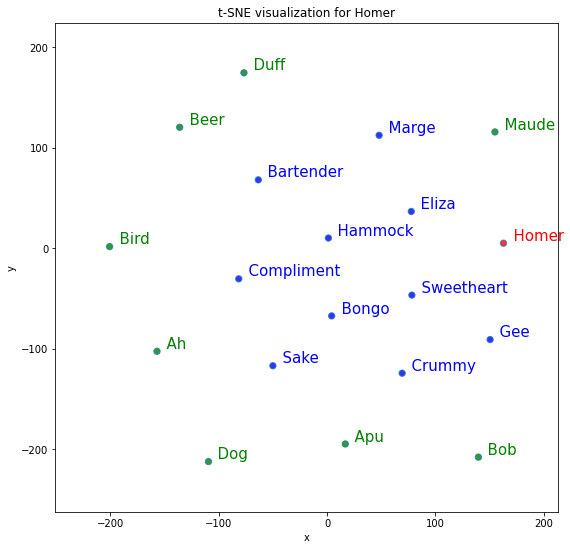

In [94]:
# Let's compare where the vector representation of Homer, his 10 most similar words 
# from the model, as well as 8 random ones, lies in a 2D graph:

tsnescatterplot(w2v_model, 'homer', ['dog', 'bird', 'ah', 'maude', 'bob', 'beer', 'apu', 'duff'])

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


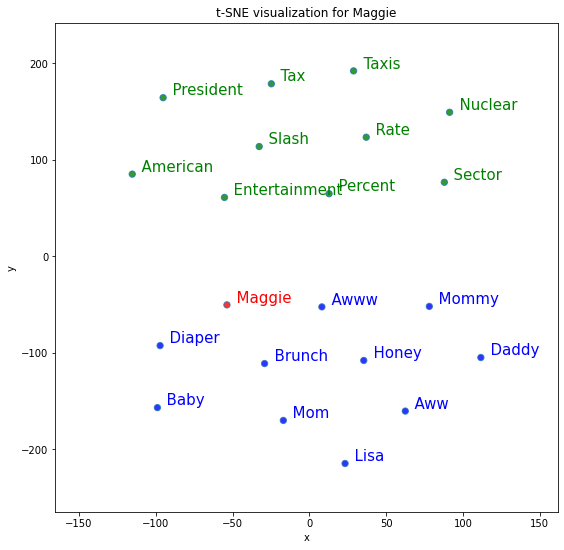

In [95]:
word = 'maggie'

tsnescatterplot(
    w2v_model, 
    word, 
    [i[0] for i in w2v_model.wv.most_similar(negative=[word])],
    )

## Carregando embeddings pretreinado em PTBR 

In [103]:
from gensim.models import KeyedVectors

t = time()

cbow_path = './cbow_s300.txt'

model = KeyedVectors.load_word2vec_format(cbow_path)

print(f'Time to load pretrained embeddings: {round((time()-t)/60, 2)} mins')

INFO - 03:46:05: loading projection weights from ./cbow_s300.txt
INFO - 03:48:22: KeyedVectors lifecycle event {'msg': 'loaded (929605, 300) matrix of type float32 from ./cbow_s300.txt', 'binary': False, 'encoding': 'utf8', 'datetime': '2022-04-12T03:48:22.525372', 'gensim': '4.1.2', 'python': '3.9.10 | packaged by conda-forge | (main, Feb  1 2022, 21:24:37) \n[GCC 9.4.0]', 'platform': 'Linux-4.14.262-200.489.amzn2.x86_64-x86_64-with-glibc2.31', 'event': 'load_word2vec_format'}


Time to load pretrained embeddings: 2.29 mins


In [104]:
print(f'vocab len: {len(model.key_to_index.keys())}')
#model.key_to_index.keys()


vocab len: 929605


In [105]:
A = model['chuva']
print(A)

[ 2.7329    -0.10711    0.55555    1.8217    -2.5545    -0.7014
  0.70765   -0.047459   1.4024     0.44671    1.456      1.4319
  1.413      2.5035    -1.5375     0.45245    1.5259     0.084284
  0.15296    1.5653    -3.8999    -2.7467    -2.53       1.2431
  2.1222    -0.97009    0.15682   -2.462      1.4924    -2.7241
  1.0554     0.16716   -0.71202   -3.0468    -0.58459    0.95183
 -1.4282    -1.2938    -1.0107    -0.80309    3.9286     1.5795
 -1.7386     2.3436     0.59917   -1.9332    -0.23397   -1.7094
 -0.92945    0.093548  -2.7132     0.63378    0.6383     1.9185
 -0.46793    3.1181    -3.068     -0.4807    -0.2446     2.3929
 -2.2468     0.56873    1.1597    -0.079359  -0.40589   -0.76973
  1.6408     1.4829     4.9385     1.1311    -1.6823     0.23834
  0.61736    1.8718    -1.8822     3.4104     0.0076786  2.1445
  1.7295    -4.725     -1.7929     3.7867     2.2846    -0.65912
 -0.77326   -0.70943    1.4775    -0.54014    0.068159  -1.5019
  2.0788     1.5762     3.0118    

In [106]:
A.shape

(300,)

In [107]:
result = model.most_similar(positive=['rei', 'mulher'], negative=['homem'])
print("{}: {:.4f}".format(*result[0]))

rainha: 0.6863


In [108]:
print(model.doesnt_match("uva onibus carro moto".split()))

uva


In [109]:
print(model.doesnt_match("palmeiras corinthians são-paulo mundial".split()))

mundial


In [110]:
result = model.similar_by_word('teste')
print (result)
#print("{}: {:.4f}".format(*result[0]))

[('teste-t', 0.8830924034118652), ('teste\x94,', 0.8828554153442383), ('teste0', 0.8746434450149536), ('cqteste', 0.8346535563468933), ('teste-piloto', 0.8328061103820801), ('testes.', 0.831045925617218), ('tester', 0.8306138515472412), ('teste-munho', 0.8243860006332397), ('testæ', 0.8231348395347595), ('testesde', 0.8161661028862)]


In [111]:
model.similarity('manga','moto')

0.30726895

In [112]:
model.similarity('manga','morango')

0.4377795

In [113]:
model.similarity('pessoa','atendente')

0.3291382

In [114]:
model.similarity('manga','camisa')

0.43052226

In [115]:
def tsnescatterplot2(model, word, list_names):
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt
    import seaborn as sns

    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


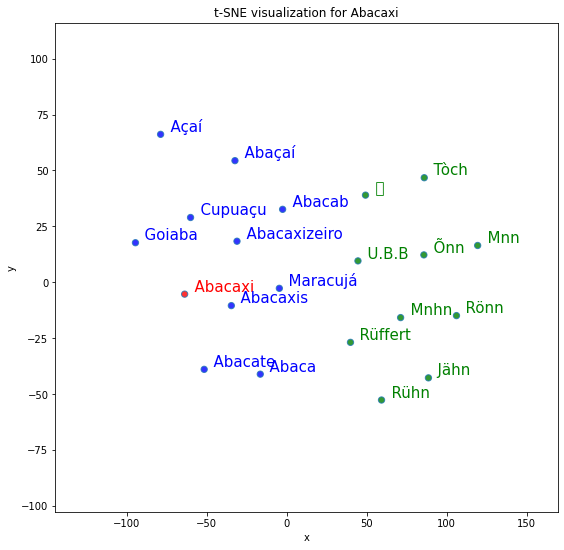

In [116]:
word = 'abacaxi'

tsnescatterplot2(
    model, 
    word, 
    [i[0] for i in model.most_similar(negative=[word])],
    )